In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040305.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

         0         1         2         3         4         5         6  \
0  1.68915  1.679374  1.667644  1.653959  1.634409  1.609971  1.581623   

          7         8         9  ...      4192      4193      4194     4195  \
0  1.550342  1.517107  1.482893  ...  1.219941  1.198436  1.176931  1.15738   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.138807  1.123167  1.109482  1.098729    117.213154      65.749601  

[1 rows x 4202 columns]
[117.21315437]  /  [65.74960081]
         0         1         2         3         4         5         6  \
0  1.68915  1.679374  1.667644  1.653959  1.634409  1.609971  1.581623   

          7         8         9  ...     4190      4191      4192      4193  \
0  1.550342  1.517107  1.482893  ...  1.26393  1.242424  1.219941  1.198436   

       4194     4195      4196      4197      4198      4199  
0  1.176931  1.15738  1.138807  1.123167  1.109482  1.098729  

[1 rows x 4200 columns]


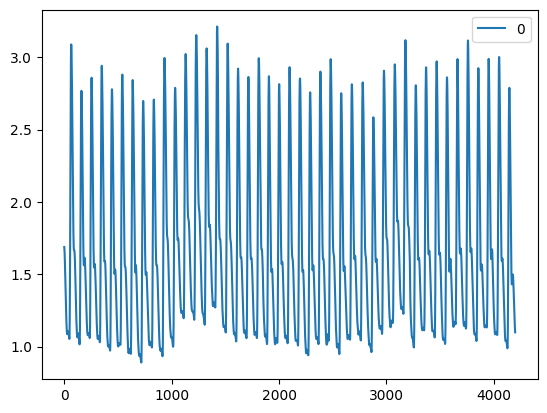

In [261]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [265]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

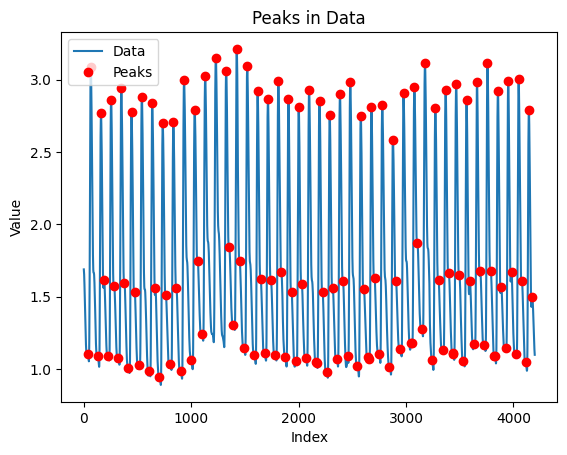

{'indices': array([  35,   65,  130,  160,  189,  228,  254,  283,  320,  349,  378,
        415,  444,  474,  515,  540,  608,  637,  666,  704,  735,  764,
        803,  834,  860,  902,  933, 1001, 1032, 1060, 1101, 1130, 1229,
       1326, 1355, 1393, 1424, 1451, 1490, 1522, 1588, 1619, 1646, 1686,
       1715, 1742, 1782, 1811, 1839, 1876, 1906, 1935, 1973, 2001, 2029,
       2069, 2098, 2162, 2169, 2195, 2223, 2260, 2290, 2318, 2357, 2385,
       2412, 2456, 2481, 2548, 2579, 2608, 2648, 2656, 2678, 2708, 2747,
       2779, 2845, 2878, 2907, 2946, 2977, 3049, 3055, 3078, 3106, 3145,
       3177, 3242, 3273, 3303, 3344, 3369, 3399, 3435, 3441, 3468, 3497,
       3533, 3564, 3596, 3635, 3662, 3692, 3730, 3759, 3790, 3824, 3828,
       3856, 3887, 3929, 3952, 3983, 4022, 4049, 4080, 4115, 4145, 4177]), 'values': array([1.10459433, 3.08895406, 1.09188661, 2.76832845, 1.61388074,
       1.09286413, 2.85923754, 1.57184751, 1.0742913 , 2.94134897,
       1.59237537, 1.00879765, 2.779081

In [266]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [271]:
def filter_peak_values(peak_values_df, threshold=1.5):
    """
    Filter peak_values_df to remove values below the specified threshold.

    Parameters:
    - peak_values_df: DataFrame containing peak values
    - threshold: float, minimum value required to keep a value (default: 1.5)

    Returns:
    - filtered_peak_values_df: DataFrame with values below threshold removed
    """
    filtered_df = peak_values_df[peak_values_df['Value'] >= threshold]
    return filtered_df

In [273]:
# Example usage
filtered_df = filter_peak_values(peak_values_df)
print(filtered_df)

     Index     Value
1       65  3.088954
3      160  2.768328
4      189  1.613881
6      254  2.859238
7      283  1.571848
..     ...       ...
113   3952  2.989247
114   3983  1.672532
116   4049  3.001955
117   4080  1.608993
119   4145  2.788856

[74 rows x 2 columns]


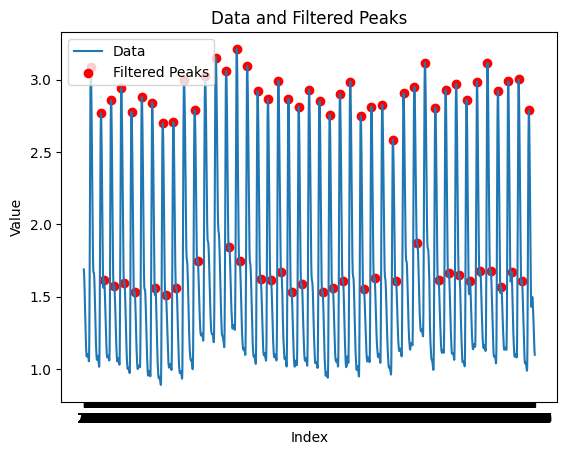

In [274]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()

In [278]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(filtered_df)
print(high_values)
print(low_values)


[3.088954056695992, 2.768328445747801, None, 2.859237536656892, None, 2.941348973607038, None, 2.779081133919844, None, 2.8807429130009776, 2.8426197458455524, None, 2.697947214076246, None, 2.70772238514174, None, 2.995112414467253, 2.788856304985337, None, 3.022482893450636, 3.15347018572825, 3.06158357771261, None, 3.2130987292277613, None, 3.0948191593352883, 2.921798631476051, None, 2.8641251221896384, None, 2.994134897360704, None, 2.8690127077223853, None, 2.814271749755621, None, 2.9315738025415445, 2.8533724340175954, None, 2.757575757575758, None, 2.9012707722385143, None, 2.9872922776148583, 2.7517106549364616, None, 2.8132942326490715, None, 2.8260019550342133, 2.5855327468230693, None, 2.9071358748778104, 2.951124144672532, None, 3.118279569892473, 2.806451612903226, None, 2.930596285434995, None, 2.9716520039100685, None, 2.8611925708699903, None, 2.9872922776148583, None, 3.1163245356793743, None, 2.924731182795699, None, 2.989247311827957, None, 3.0019550342130987, None

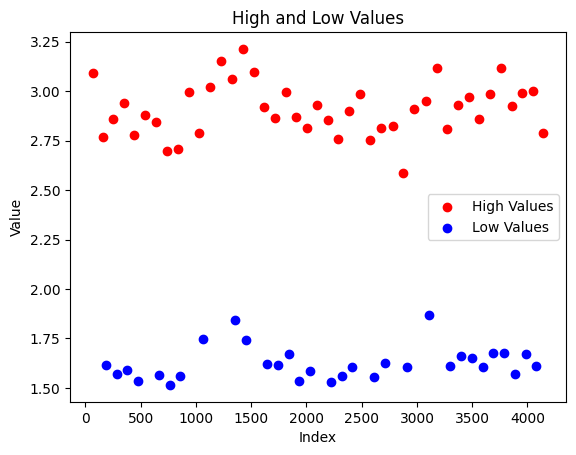

In [279]:
# Plot high values
plt.scatter(filtered_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(filtered_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [280]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.909795630725863
Average Low Value: 1.626052407530035


In [293]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0.5, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [294]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.909795630725863 : 0.6885130373502466
Scaled value of 1.626052407530035 : 0.32172925929429574
